# Polynomial interpolation
Nel seguito di questo notebook verrà presentato un approccio alla base del 
ML: fitting polinomiale. Nello specifico verranno generati dei punti casualmente 
distribuiti attorno alla funzione seno e si otterà il polinomio interpolante 
(overfitting) che attraversa tutti i punti (di learning). In seguito si rappresenteranno 
polinomi aventi gradi inferiori a $n-1$ (dove $n$ rappresenta il numero di punti 
precedentemente generati) e si calcolerà lo scarto quadratico medio o root mean 
square error $E_{RMS}$ per ogni grado.

In [15]:
graphics_toolkit("notebook")

In [1]:
sen = @(x) sin(2*pi*x);
x = linspace(0,1,100)
y = sen(x)

x,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0,0.010101,0.020202,0.030303,0.040404,0.0505051,0.0606061,0.0707071,0.0808081,0.0909091,0.10101,0.111111,0.121212,0.131313,0.141414,0.151515,0.161616,0.171717,0.181818,0.191919,0.20202,0.212121,0.222222,0.232323,0.242424,0.252525,0.262626,0.272727,0.282828,0.292929,0.30303,0.313131,0.323232,0.333333,0.343434,0.353535,0.363636,0.373737,0.383838,0.393939,0.40404,0.414141,0.424242,0.434343,0.444444,0.454545,0.464646,0.474747,0.484848,0.494949,0.505051,0.515152,0.525253,0.535354,0.545455,0.555556,0.565657,0.575758,0.585859,0.59596,0.606061,0.616162,0.626263,0.636364,0.646465,0.656566,0.666667,0.676768,0.686869,0.69697,0.707071,0.717172,0.727273,0.737374,0.747475,0.757576,0.767677,0.777778,0.787879,0.79798,0.808081,0.818182,0.828283,0.838384,0.848485,0.858586,0.868687,0.878788,0.888889,0.89899,0.909091,0.919192,0.929293,0.939394,0.949495,0.959596,0.969697,0.979798,0.989899,1


y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0,0.0634239,0.126592,0.189251,0.251148,0.312033,0.371662,0.429795,0.486197,0.540641,0.592908,0.642788,0.690079,0.734592,0.776146,0.814576,0.849725,0.881453,0.909632,0.934148,0.954902,0.971812,0.984808,0.993838,0.998867,0.999874,0.996855,0.989821,0.978802,0.963842,0.945001,0.922354,0.895994,0.866025,0.83257,0.795762,0.75575,0.712694,0.666769,0.618159,0.56706,0.513677,0.458227,0.400931,0.34202,0.281733,0.220311,0.158001,0.095056,0.0317279,-0.0317279,-0.095056,-0.158001,-0.220311,-0.281733,-0.34202,-0.400931,-0.458227,-0.513677,-0.56706,-0.618159,-0.666769,-0.712694,-0.75575,-0.795762,-0.83257,-0.866025,-0.895994,-0.922354,-0.945001,-0.963842,-0.978802,-0.989821,-0.996855,-0.999874,-0.998867,-0.993838,-0.984808,-0.971812,-0.954902,-0.934148,-0.909632,-0.881453,-0.849725,-0.814576,-0.776146,-0.734592,-0.690079,-0.642788,-0.592908,-0.540641,-0.486197,-0.429795,-0.371662,-0.312033,-0.251148,-0.189251,-0.126592,-0.0634239,-2.44929e-16


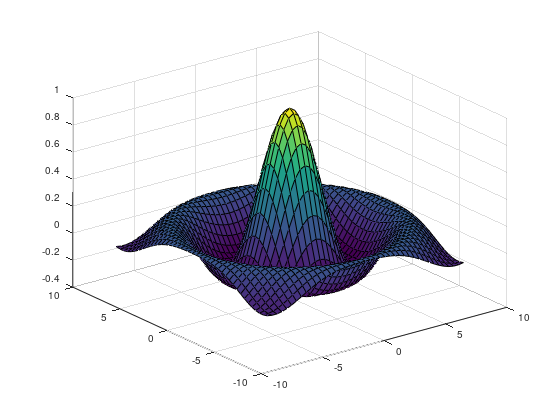

In [2]:
sombrero

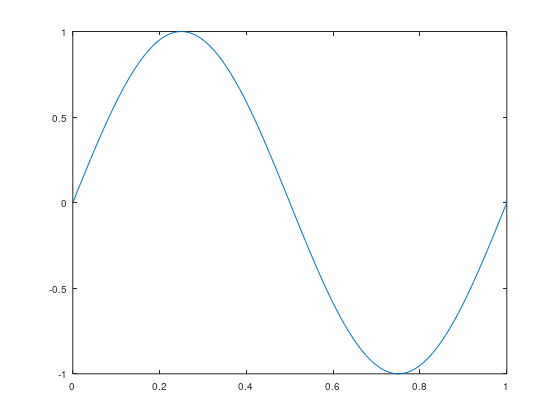

In [2]:
plot(x,y)

In [ ]:
sen = @(x) sin(2*pi*x);
x = linspace(0,1,100)
y = sen(x)

plot(x,y)
xlabel("x")
ylabel("y")
legend("y = sin(2\pi x)")

x,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0,0.010101,0.020202,0.030303,0.040404,0.0505051,0.0606061,0.0707071,0.0808081,0.0909091,0.10101,0.111111,0.121212,0.131313,0.141414,0.151515,0.161616,0.171717,0.181818,0.191919,0.20202,0.212121,0.222222,0.232323,0.242424,0.252525,0.262626,0.272727,0.282828,0.292929,0.30303,0.313131,0.323232,0.333333,0.343434,0.353535,0.363636,0.373737,0.383838,0.393939,0.40404,0.414141,0.424242,0.434343,0.444444,0.454545,0.464646,0.474747,0.484848,0.494949,0.505051,0.515152,0.525253,0.535354,0.545455,0.555556,0.565657,0.575758,0.585859,0.59596,0.606061,0.616162,0.626263,0.636364,0.646465,0.656566,0.666667,0.676768,0.686869,0.69697,0.707071,0.717172,0.727273,0.737374,0.747475,0.757576,0.767677,0.777778,0.787879,0.79798,0.808081,0.818182,0.828283,0.838384,0.848485,0.858586,0.868687,0.878788,0.888889,0.89899,0.909091,0.919192,0.929293,0.939394,0.949495,0.959596,0.969697,0.979798,0.989899,1


y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0,0.0634239,0.126592,0.189251,0.251148,0.312033,0.371662,0.429795,0.486197,0.540641,0.592908,0.642788,0.690079,0.734592,0.776146,0.814576,0.849725,0.881453,0.909632,0.934148,0.954902,0.971812,0.984808,0.993838,0.998867,0.999874,0.996855,0.989821,0.978802,0.963842,0.945001,0.922354,0.895994,0.866025,0.83257,0.795762,0.75575,0.712694,0.666769,0.618159,0.56706,0.513677,0.458227,0.400931,0.34202,0.281733,0.220311,0.158001,0.095056,0.0317279,-0.0317279,-0.095056,-0.158001,-0.220311,-0.281733,-0.34202,-0.400931,-0.458227,-0.513677,-0.56706,-0.618159,-0.666769,-0.712694,-0.75575,-0.795762,-0.83257,-0.866025,-0.895994,-0.922354,-0.945001,-0.963842,-0.978802,-0.989821,-0.996855,-0.999874,-0.998867,-0.993838,-0.984808,-0.971812,-0.954902,-0.934148,-0.909632,-0.881453,-0.849725,-0.814576,-0.776146,-0.734592,-0.690079,-0.642788,-0.592908,-0.540641,-0.486197,-0.429795,-0.371662,-0.312033,-0.251148,-0.189251,-0.126592,-0.0634239,-2.44929e-16


In [1]:
% cleaning enviroment
clc
clear

Rappresento la funzione $y = sin(2\pi x)$ con $0 \leq x\leq 1$

In [ ]:
% funzione seno
% sen = @(x) sin(2*pi*x);

% genero vettori
x = linspace(0,1,100);
y = sen(x);

% plotto funzione seno
figure;
plot(x,y)
xlabel("x")
ylabel("y")
legend("y = sin(2\pi x)")

fatal: caught signal Segmentation fault -- stopping myself...

In [ ]:
% Genero set di learning avente |n_lrn| punti randomicamente distribuiti attorno 
% alla funzione seno

% genero set di learning
n_lrn = 10;
x_lrn = linspace(0,1,n_lrn);
eps = 0.15;
y_lrn = sin(2*pi*x_lrn);
y_lrn = y_lrn + (-eps + (2.*eps).*rand(n_lrn,1))';

figure
plot(x,y)
hold on
plot(x_lrn,y_lrn,"o")
legend("sin(2\pix)","data")
xlabel("x")
ylabel("y")
hold off

Il *polinomio interpolante* è quel polinomio la cui curva passa attraverso 
tutti i punti sperimentali. Se il polinomio ha forma generale $y=a_1 + a_2 x 
+ a_3 x^3 + ... + a_n x^{n-1}$ dove 
 
* $n$ è il numero di punti da fittare;
* $a_1$, $a_2$, ..., $a_n$ sono gli $n$ coefficienti del polinomio;
 
Posto $\bar{x} = (x_1, x_2, ..., x_n)$, affinchè il polinomio attraversi tutti 
i punti del vettore $\bar{x}$ deve verificare le seguenti condizioni:
 
* $y_1=a_1 + a_2 x_1 + a_3 x_1^3 + ... + a_n x_1^{n-1}$     (condizione passaggio 
per il punto $x_1$)
* $y_2=a_1 + a_2 x_2 + a_3 x_2^3 + ... + a_n x_2^{n-1}$     (condizione passaggio 
per il punto $x_2$)
* ...
* $y_n=a_1 + a_2 x_n + a_3 x_n^3 + ... + a_n x_n^{n-1}$     (condizione passaggio 
per il punto $x_n$)
 
che rappresenta un sistema di $n$ equazioni in $n$ incognite. Il nostro obiettivo 
consiste nel risolvere il sistema per determinare gli $n$ coefficienti $a_1$, 
$a_2$, ..., $a_n$ e quindi il polinomio interpolante.

Sfruttando il formalismo matriciale è possibile rappresentare il sistema di 
$n$ equazioni come di seguito

$$\pmatrix{y_1 \cr y_2 \cr ... \cr y_n} = \pmatrix{1 & x_1 & x_1^2 & ... & 
x_1^{n-1} \cr 1 & x_2 & x_2^2 & ... & x_2^{n-1} \cr ... & ... & ... & ... & 
... \cr 1 & x_n & x_n^2 & ... & x_n^{n-1}} \cdot \pmatrix{a_1 \cr a_2 \cr ... 
\cr a_n}$$

La matrice $\pmatrix{1 & x_1 & x_1^2 & ... & x_1^{n-1} \cr 1 & x_2 & x_2^2 
& ... & x_2^{n-1} \cr ... & ... & ... & ... & ... \cr 1 & x_n & x_n^2 & ... 
& x_n^{n-1}}$ prende il nome "matrice di Vandermonde" e si genera a partire 
da un singolo vettore

In [ ]:
% genero matrice di Vandermonde
V = fliplr(vander(x_lrn))
%% 
% Risolvo il sistema $y = \alpha V$ dove $\alpha$ sono i coefficienti del polinomio 
% cercato: $y = \alpha_1 + \alpha_2 x_1 + \alpha_3 x_2^2+...$
% 
% Alla luce della forma matriciale, è possibile determinare i coefficienti $\alpha$ 
% eseguendo il prodotto righe per colonna tra l'inversa della matrice di Vandermonde 
% e il vettore colonna y

% determino i coefficienti
% a = pinv(V)*(y_lrn')
a = V\y_lrn'

% ottengo il polinomio funzione degli scalari x e m (grado)
poly = @(x,m) (x.^(0:m))*(a(1:m+1));

% over-fitting
z = zeros(1,100);
for i=1:100
    z(i) = poly(x(i),n_lrn-1);
end
%%
figure;
plot(x,z,"r")
hold on
plot(x_lrn,y_lrn,'ob')
plot(x,y,"g")
hold off
legend("polynomial fit", "data", "sin(2\pix)")
xlabel("x")
ylabel("y")
ylim([-1.5 1.5])
xlim([0 1])

In [ ]:
% plotting at different M (polynomial order)

% plot M = 0
figure;
plot(x,repelem(a(1),length(x)),"r")
hold on
plot(x_lrn,y_lrn,'ob')
plot(x,y,"g")
hold off
legend("polynomial fit", "data", "sin(2\pix)")
xlabel("x")
ylabel("y")
ylim([-1.5 1.5])
xlim([0 1])
title("M=0")

% plot M = 1
figure;
plot(x,(a(1)+a(2).*x),"r")
hold on
plot(x_lrn,y_lrn,'ob')
plot(x,y,"g")
hold off
legend("polynomial fit", "data", "sin(2\pix)")
xlabel("x")
ylabel("y")
ylim([-1.5 1.5])
xlim([0 1])
title("M=1")

% plot M = 3
figure;
plot(x,(a(1) + (a(2).*x) + a(3).*x.^2 + a(4).*x.^3),"r")
hold on
plot(x_lrn,y_lrn,'ob')
plot(x,y,"g")
hold off
legend("polynomial fit", "data", "sin(2\pix)")
xlabel("x")
ylabel("y")
ylim([-1.5 1.5])
xlim([0 1])
title("M=3")

In [ ]:
% learning error

% initializing vectors
learning_error = zeros(1,n_lrn);
y_fit = learning_error;

for j = 1:n_lrn

    % estimate y points
    for i = 1:n_lrn
        y_fit(i) = poly(x_lrn(i),j-1);
    end

    % calculating learning error
    learning_error(j) = sqrt(sum((y_fit-y_lrn).^2))/n_lrn;
end

% plotting learning error
plot(0:n_lrn-1,learning_error,"-o")
xlabel("M (grado del polinomio interpolante)")
ylabel("Scarto quadratico medio")
legend("Training")